In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r'/Users/aceboogie/Desktop/medical_clean.csv')
data.isnull().sum()
data.dropna(inplace=True)
categorical_columns = ['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Check for outliers using boxplots, scatterplots, or summary statistics
Summary_stats = data.describe()

# Remove or adjust outliers if necessary
# Example: Remove rows with values outside the range of the 1st and 99th percentile
Q1 = data.quantile(0.01)
Q99 = data.quantile(0.99)
data = data[~((data < Q1) | (data > Q99)).any(axis=1)]


/var/folders/7h/d1wz9q2901z6f4x7gmz0vxtm0000gn/T/ipykernel_34737/322917806.py:15: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.01)
/var/folders/7h/d1wz9q2901z6f4x7gmz0vxtm0000gn/T/ipykernel_34737/322917806.py:16: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q99 = data.quantile(0.99)
/var/folders/7h/d1wz9q2901z6f4x7gmz0vxtm0000gn/T/ipykernel_34737/322917806.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < Q1) | (data > Q9

In [40]:
Summary_stats

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,Complication_risk_Medium,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,0.451700,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,0.497687,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


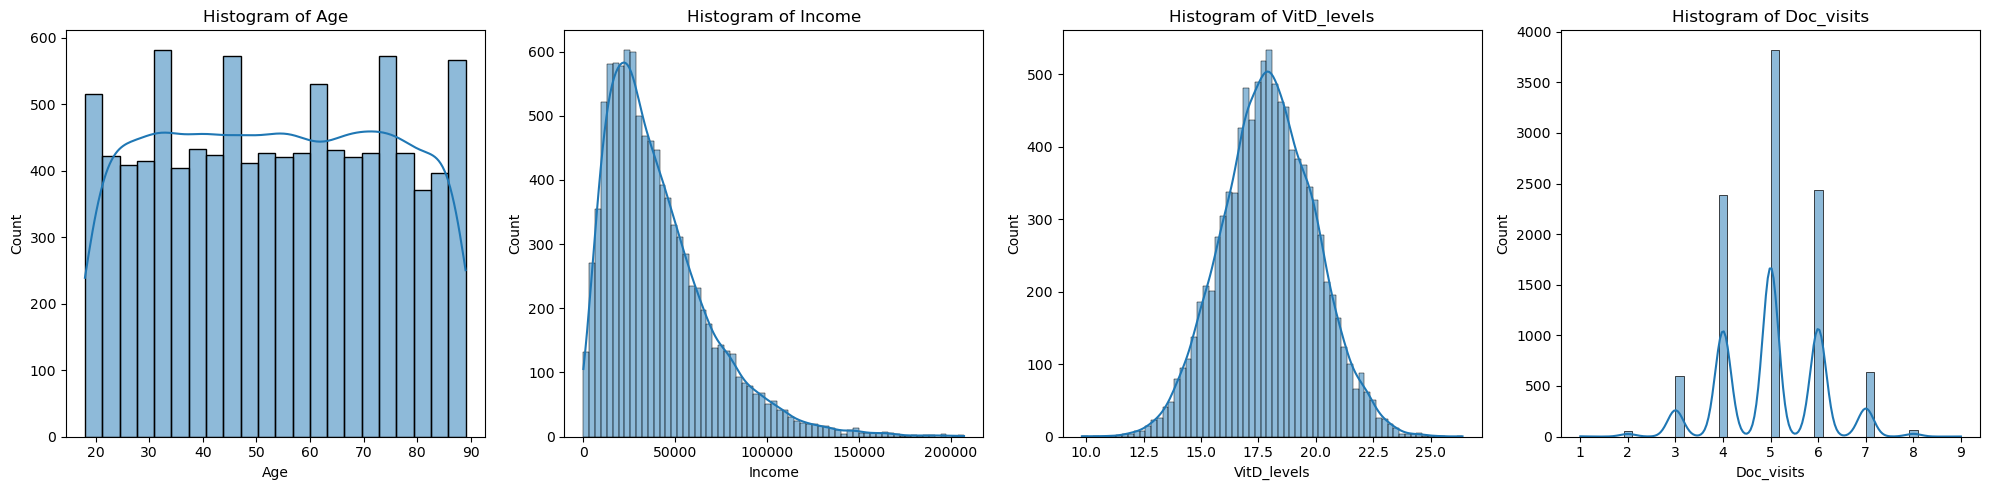

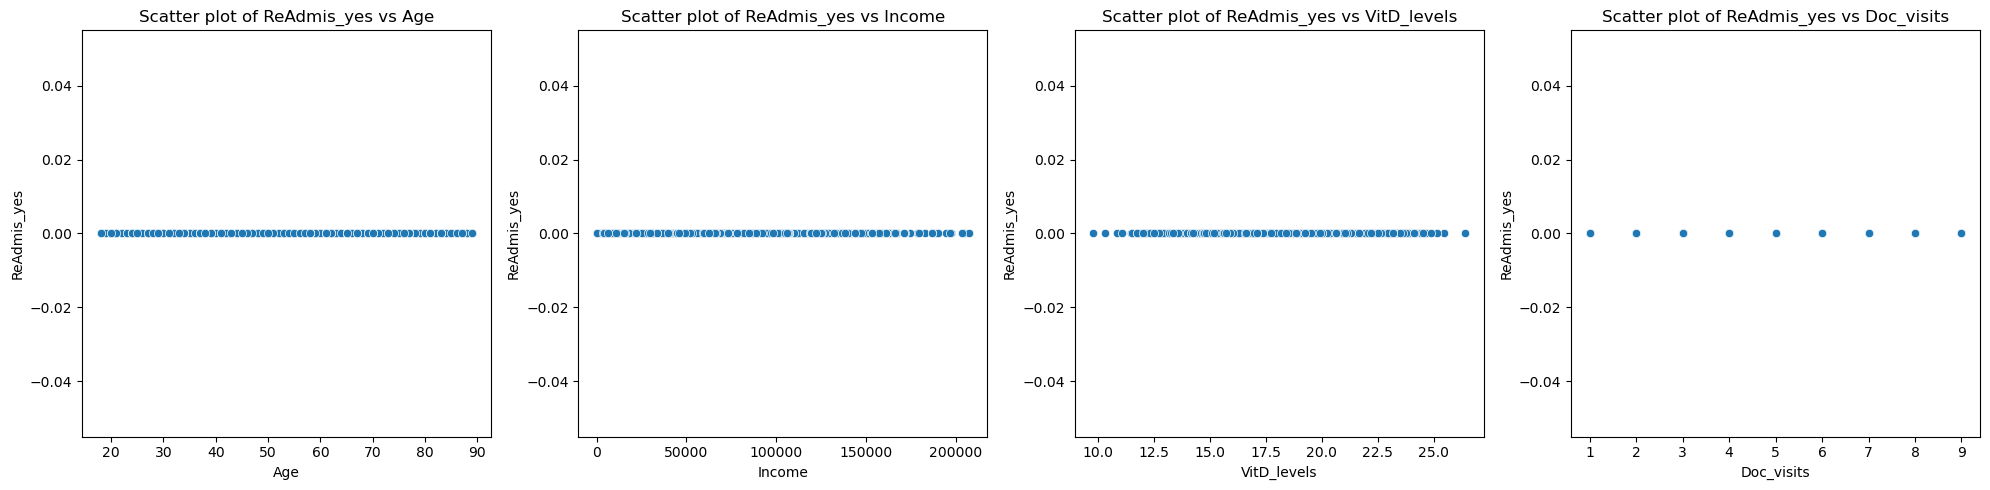

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv(r'/Users/aceboogie/Desktop/medical_clean.csv')

# Convert relevant columns to numeric types
numeric_columns = ['Age', 'Income', 'VitD_levels', 'Doc_visits', 'ReAdmis']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Add a new binary column for readmission status
df['ReAdmis_yes'] = (df['ReAdmis'] == 1).astype(int)

# Select a subset of relevant independent variables
selected_variables = ['Age', 'Income', 'VitD_levels', 'Doc_visits']  # Adjust this list as needed

# Univariate visualizations (histograms)
fig, axes = plt.subplots(nrows=1, ncols=len(selected_variables), figsize=(20, 5))
for idx, column in enumerate(selected_variables):
    ax = axes[idx]
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
fig.tight_layout()
plt.show()

# Bivariate visualizations (scatter plots)
dependent_variable = 'ReAdmis_yes'  # Replace this with your dependent variable
fig, axes = plt.subplots(nrows=1, ncols=len(selected_variables), figsize=(20, 5))
for idx, column in enumerate(selected_variables):
    ax = axes[idx]
    sns.scatterplot(data=df, x=column, y=dependent_variable, ax=ax)
    ax.set_title(f'Scatter plot of {dependent_variable} vs {column}')
fig.tight_layout()
plt.show()



In [54]:
import pandas as pd

# Load the raw dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/medical_clean.csv')

# Step 1: Transform categorical variables using one-hot encoding
categorical_columns = ['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


# Step 3: Data cleaning (e.g., handling missing values, outliers, etc.)
# Example: Drop rows with missing values
df = df.dropna()

# Save the transformed dataset to a new CSV file
df.to_csv('Catigorical_transformed_medical_data.csv', index=False)


In [43]:
import pandas as pd
import statsmodels.api as sm

# Assuming the data is stored in a DataFrame called df
# Replace 'ReAdmis' with 'Readmitted' if necessary
df['ReAdmis'] = df['ReAdmis'].map({'No': 0, 'Yes': 1})

# Define the dependent variable (y) and the independent variables (X)
y = df['ReAdmis']
X = df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Additional_charges', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes']]

# Add a constant to the independent variables (X)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the summary of the model
print(logit_model.summary())





Optimization terminated successfully.
         Current function value: 0.656320
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                0.001469
Time:                        13:38:01   Log-Likelihood:                -6563.2
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.5655
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7065      0.232     -3.046      0.002      -1.161

In [52]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv(r'/Users/aceboogie/Desktop/Catigorical_transformed_medical_data.csv')

# Replace 'ReAdmis' with 'Readmitted' if necessary
df['ReAdmis'] = df['ReAdmis'].map({'No': 0, 'Yes': 1})

# Define the dependent variable (y) and the independent variables (X)
y = df['ReAdmis']
X = df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Additional_charges', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample the minority class using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model with class weights
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_res, y_train_res)

# Evaluate the model on the test set
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

# Fit the logistic regression model using statsmodels for detailed summary
X_train_sm = sm.add_constant(X_train_res)
log_reg_sm = sm.Logit(y_train_res, X_train_sm).fit()
print(log_reg_sm.summary())


              precision    recall  f1-score   support

           0       0.64      0.59      0.62      1291
           1       0.35      0.41      0.38       709

    accuracy                           0.52      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.54      0.52      0.53      2000

Optimization terminated successfully.
         Current function value: 0.639637
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10080
Model:                          Logit   Df Residuals:                    10058
Method:                           MLE   Df Model:                           21
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                 0.07720
Time:                        13:45:04   Log-Likelihood:                -6447.5
converged:                       True   LL-Null:                       -6986.9
Covariance Type:  

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[761 530]
 [421 288]]
Accuracy: 0.5245
